In [63]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA
import numpy as np
from scipy.sparse.csgraph import shortest_path
from sklearn.neighbors import kneighbors_graph
from numpy.linalg import eigh
from operator import itemgetter, attrgetter
from sklearn import manifold

In [3]:
iris = datasets.load_iris()
y = iris.target

In [70]:
def TriVP(Valp,Vectp):
    # trie dans l'ordre décroisant les valeurs propres
    # en cas de valeurs propres complexes on trie  selon leu module
    liste1 = Vectp.tolist()
    liste2 = Valp.tolist()
    norme = np.abs(Valp)
    liste3 = norme.tolist()

    result = zip(liste1, liste2,liste3)
    result_trie =sorted(result,key =itemgetter(2), reverse=True)
    liste1, liste2, liste3 =  zip(*result_trie)
    Vectp = np.asarray(liste1)
    Valp = np.asarray(liste2)
    
    return Valp,Vectp
def isomap(X,symetrie=False):
    n_neighbors=50
    m=X.shape[0]
    kng = kneighbors_graph(X, n_neighbors,mode='distance')
    if symetrie==True:
        kng=kng+kng.T
    dist_matrix = shortest_path(kng,method='D',directed=False)
    I = np.eye(m)
    ones = np.ones(m)
    B=-0.5*(I-(1/m)*ones)@(dist_matrix**2)@(I-(1/m)*ones)
    Valp,Vectp = eig(B)
    Valp,Vectp = TriVP(Valp,Vectp)
    Y=Vectp[:,:2]*np.sqrt(Valp[:2])
    return Y


/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


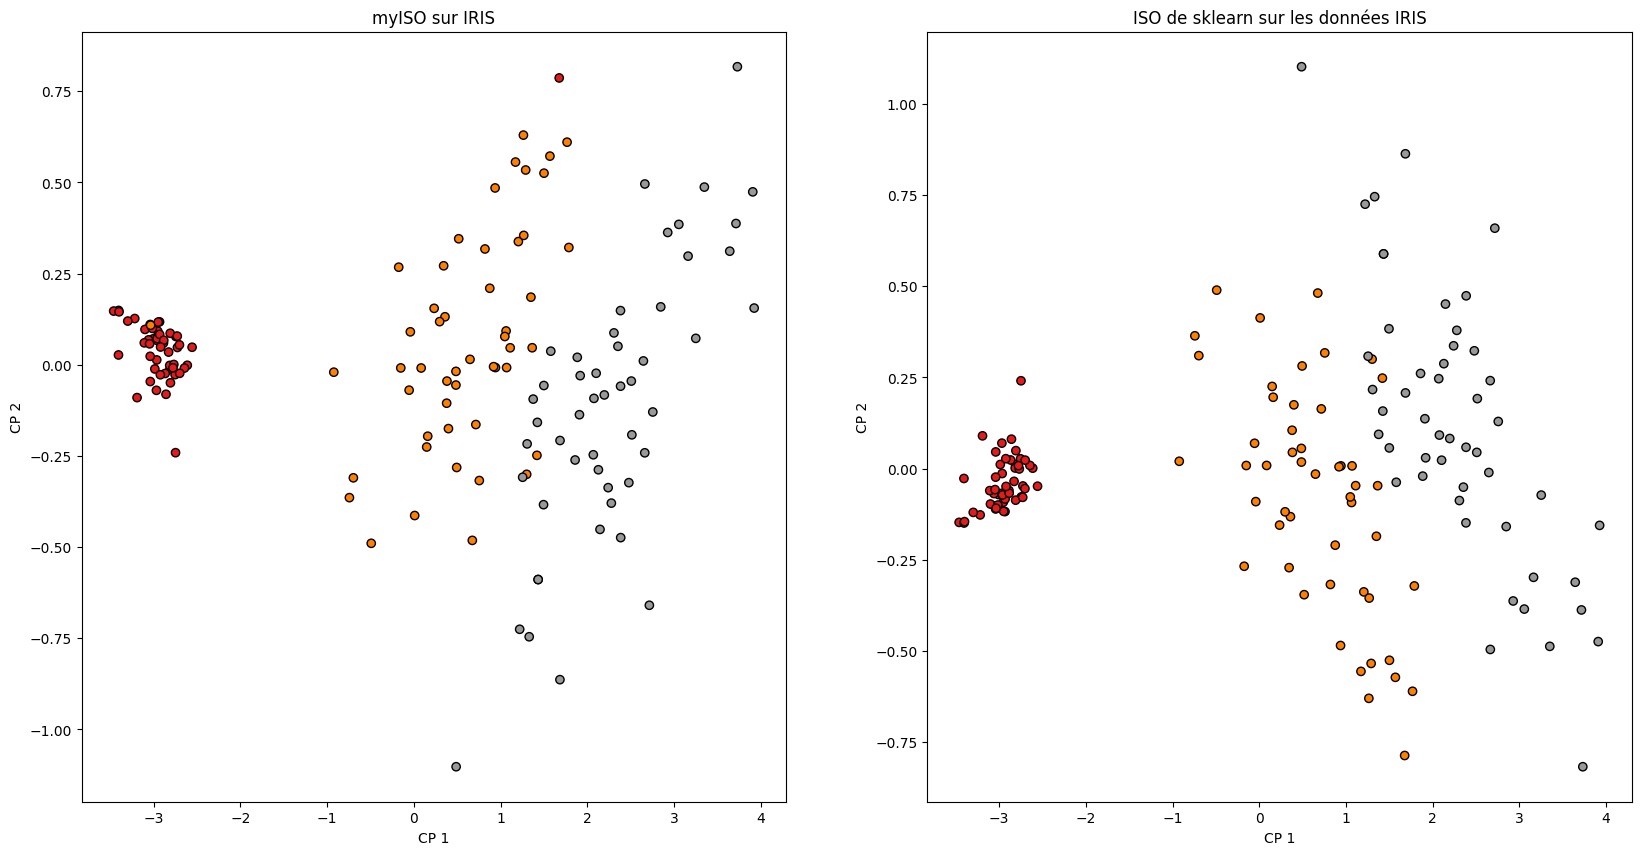

In [71]:
Y=isomap(iris.data)
plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('myISO sur IRIS')
Y_sckit = manifold.Isomap(n_neighbors=50, n_components=2).fit_transform(iris.data)
plt.subplot(1, 2, 2)
plt.scatter(Y_sckit[:, 0], Y_sckit[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('ISO de sklearn sur les données IRIS')
plt.show()

In [51]:
mnist = datasets.load_digits()
X_mnist = mnist.data
y_mnist = mnist.target

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


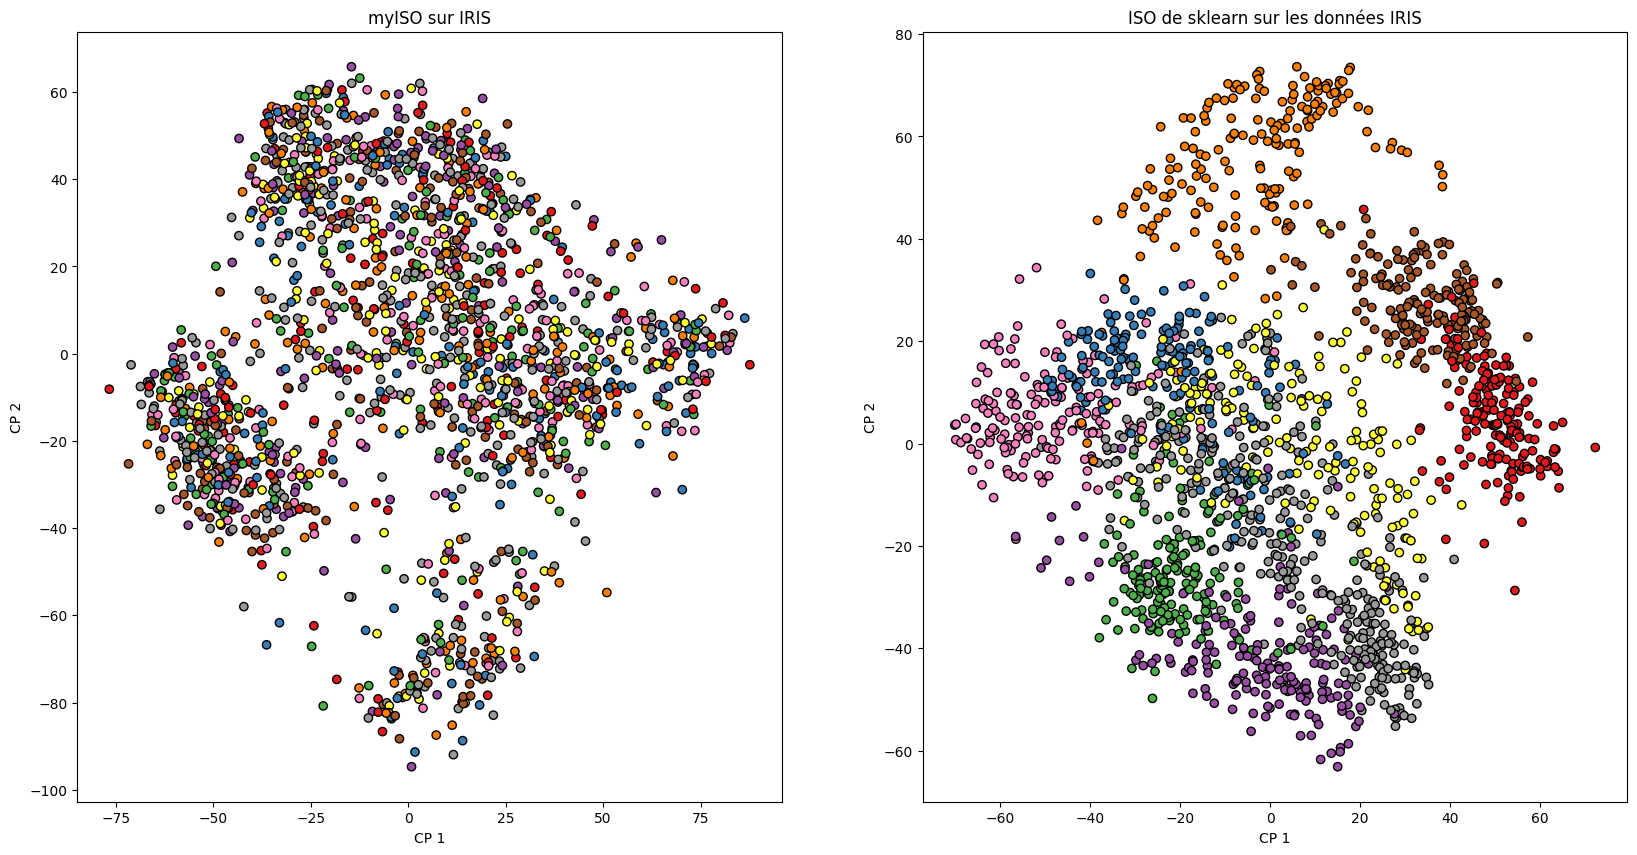

In [73]:
Y=isomap(X_mnist,True)
plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(Y[:, 0], Y[:, 1], c=y_mnist, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('myISO sur IRIS')
Y_sckit = manifold.Isomap(n_neighbors=70, n_components=2).fit_transform(X_mnist)
plt.subplot(1, 2, 2)
plt.scatter(Y_sckit[:, 0], Y_sckit[:, 1], c=y_mnist, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('ISO de sklearn sur les données IRIS')
plt.show()

In [8]:
iris.data[:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [9]:
mnist = datasets.load_digits()
X_mnist = mnist.data
y_mnist = mnist.target

In [10]:
y_mnist

array([0, 1, 2, ..., 8, 9, 8])

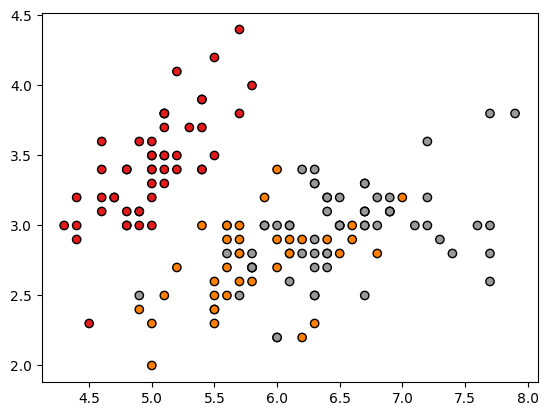

In [11]:
plt.scatter(iris.data[:, 0], iris.data[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')

  (np.int32(0), np.int32(17))	0.09999999999999998
  (np.int32(0), np.int32(4))	0.1414213562373093
  (np.int32(0), np.int32(39))	0.14142135623730964
  (np.int32(0), np.int32(28))	0.14142135623730995
  (np.int32(0), np.int32(27))	0.14142135623730995
  (np.int32(0), np.int32(40))	0.17320508075688743
  (np.int32(0), np.int32(7))	0.17320508075688762
  (np.int32(0), np.int32(49))	0.22360679774997896
  (np.int32(0), np.int32(37))	0.24494897427831727
  (np.int32(0), np.int32(21))	0.30000000000000016
  (np.int32(0), np.int32(48))	0.30000000000000027
  (np.int32(0), np.int32(26))	0.316227766016838
  (np.int32(0), np.int32(19))	0.33166247903553986
  (np.int32(0), np.int32(46))	0.3605551275463989
  (np.int32(0), np.int32(35))	0.37416573867739383
  (np.int32(0), np.int32(11))	0.3741657386773941
  (np.int32(0), np.int32(10))	0.37416573867739483
  (np.int32(0), np.int32(31))	0.3872983346207423
  (np.int32(0), np.int32(36))	0.41231056256176635
  (np.int32(0), np.int32(20))	0.4358898943540679
  (np.int

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook.py:1762: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:197: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


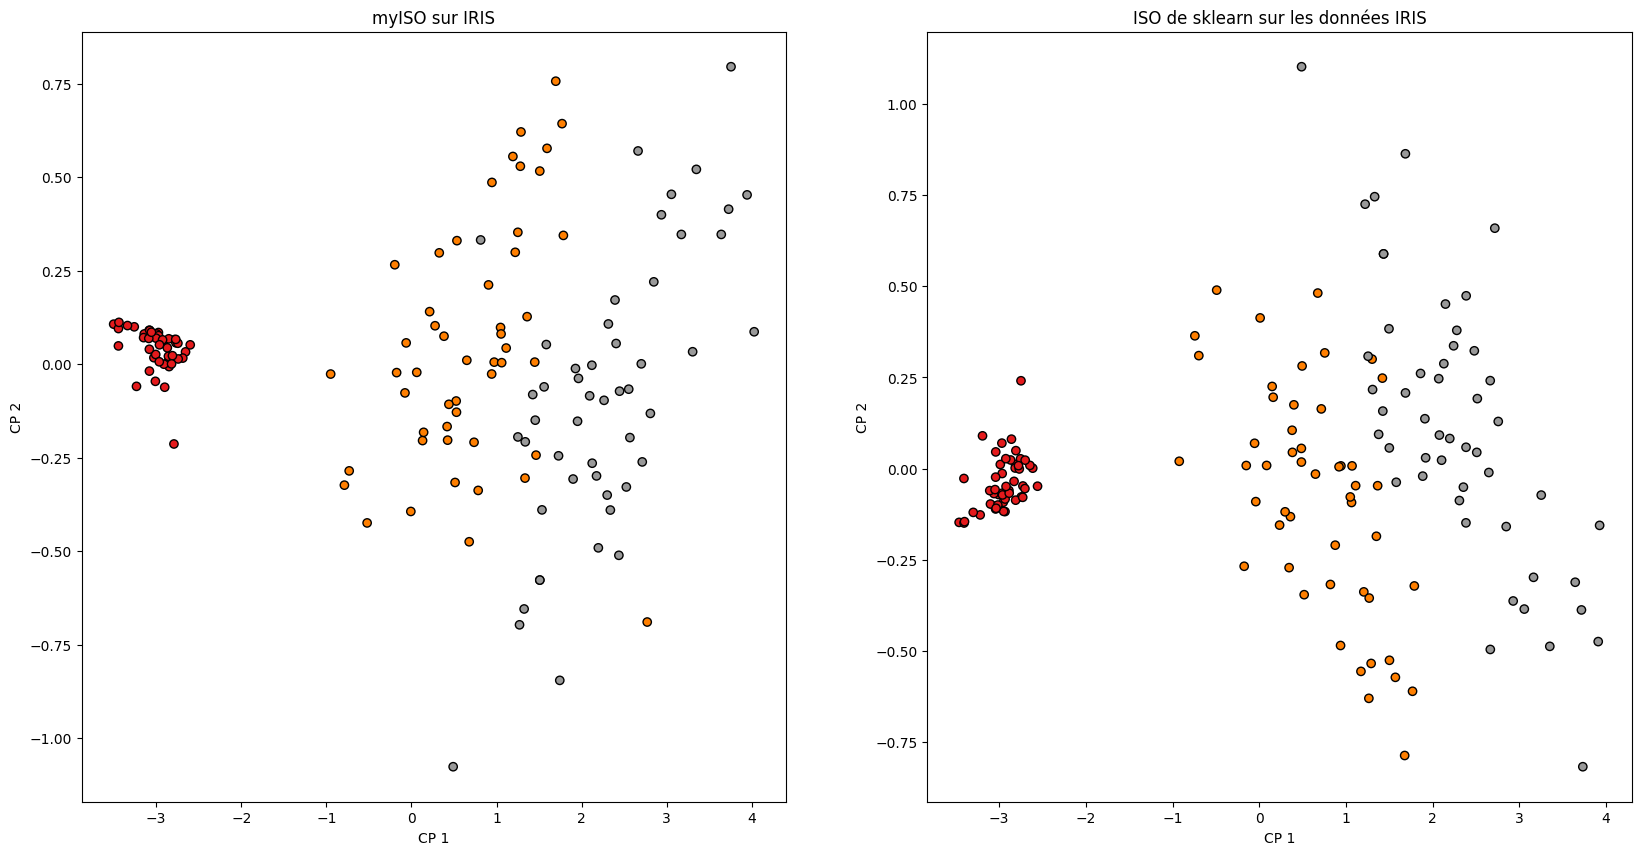

In [25]:
Y=isomap(iris.data)
plt.subplots(nrows=1, ncols=2, figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.scatter(Y[:, 0], Y[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('myISO sur IRIS')
Y_sckit = manifold.Isomap(n_neighbors=50, n_components=2).fit_transform(iris.data)
plt.subplot(1, 2, 2)
plt.scatter(Y_sckit[:, 0], Y_sckit[:, 1], c=y, cmap=plt.cm.Set1,edgecolor='k')
plt.xlabel('CP 1')
plt.ylabel('CP 2')
plt.title('ISO de sklearn sur les données IRIS')
plt.show()